# Wine Recognition

### Mt SAC CISB 62 Midterm Project Fall 2023
# Roberth Bellido

### Introduction

# This is a copy of UCI ML Wine recognition datasets.
# The data is the results of a chemical analysis of wines grown in the same
# region in Italy by three different cultivators. There are thirteen different
# measurements taken for different constituents found in the three types of
# wine

In [1]:
#!pip install keras_tuner

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import keras
from sklearn.model_selection import GridSearchCV
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K #

from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import shutil

from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.layers import Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

from collections import Counter
from sklearn.svm import SVC
import itertools

Using TensorFlow backend


## Exploratory Data Analysis (EDA)

In [3]:
#load dataset
data = datasets.load_wine()

### print the keys

In [4]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


## Display some information about the project 

In [5]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [6]:
# Read the Dataframe, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

#Add a target column, and fill it with the target data
df['target'] = data.target
# Show the first five rows
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
#Create the variables X, y.
#For X, assing the values form the dataset, except the first and last columns
#For Y, assing the class value (the value in the last columns)

X= df.iloc[:, 1:-1].values
y= df.iloc[:, -1].values

In [9]:
#print X
X[0]

array([1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00, 3.060e+00,
       2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00, 1.065e+03])

In [10]:
#print the shape of X
X.shape

(178, 12)

In [11]:
#print y
y[0]

0

In [12]:
#print the shape of y
y.shape

(178,)

Text(0.5, 1.0, 'Distribution of Target')

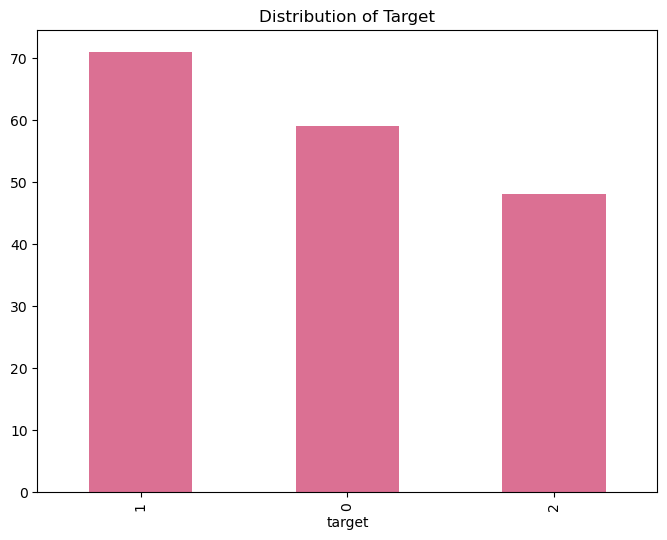

In [13]:
target = df['target'].value_counts()
target.plot(kind = 'bar', color = 'palevioletred', figsize = (8,6))
plt.title('Distribution of Target')

Text(0.5, 1.0, 'Distribution of Wine Classes')

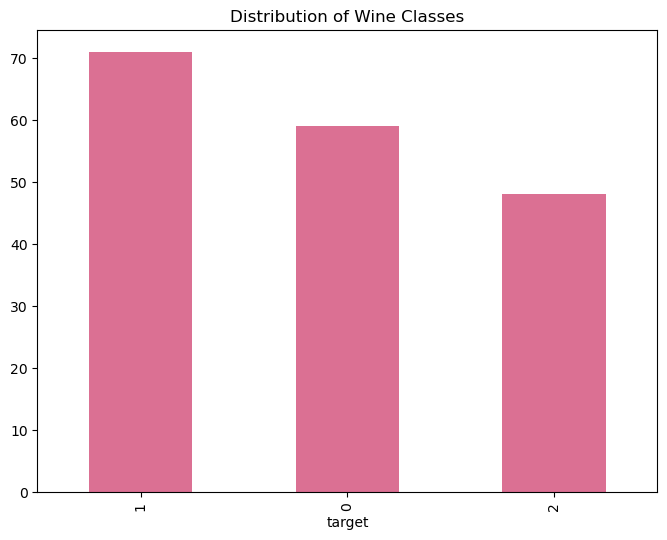

In [49]:
target = df['target'].value_counts()
target.plot(kind = 'bar', color = 'palevioletred', figsize = (8,6))
plt.title('Distribution of Wine Classes')

<Axes: >

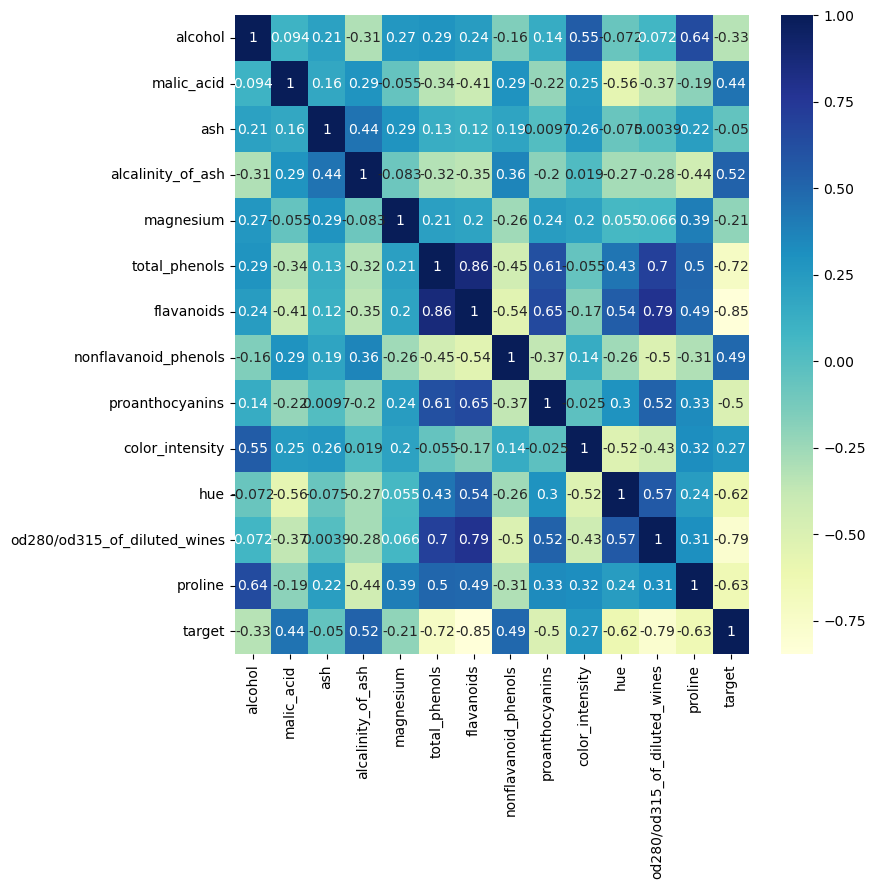

In [50]:
fig = plt.figure()
fig.set_size_inches(8.3, 8.3)
sns.heatmap(data=df.corr(), cmap="YlGnBu", annot=True)

### split the dataset 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Split (X, y) into: X_train, X_test, y_train, y_test; use a test_size = 0.2
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
#feature scaling, create a variable to use StandardScaler
sc = StandardScaler()

In [18]:
#use sc.fit_transform for both X_train and X_test
#hint: X_train= sc.fit_transform(X_test)
#X_test = sc.fit_transform(X_test)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
#display the shape of X_train
X_train.shape

(142, 12)

In [20]:
#display X_train
X_train[0]

array([-0.55220613, -1.68960673,  0.05044995, -0.94885261,  0.35416916,
       -0.36534113,  0.04934806, -0.27892556, -1.29202463, -0.06449311,
       -0.20411778, -1.07355813])

In [21]:
#display the shape of X_test
X_test.shape

(36, 12)

# Applying Deep Learning Techniques

In [24]:
#print the avlue of X_test
#print(X_test)

In [25]:
#initializing the ANN
#use a sequential model
#add a layer
#second layer
#compile model

# add a sequential model
model = Sequential()

# adding the first layer
model.add(Dense(18, input_shape=(12,), activation='relu'))

# adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

#compiling the ANN
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                234       
                                                                 
 dense_1 (Dense)             (None, 1)                 19        
                                                                 
Total params: 253 (1012.00 Byte)
Trainable params: 253 (1012.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#use model.fit to train the ANN
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=5, epochs=10)

Epoch 1/10
29/29 [==============================] - 1s 9ms/step - loss: 0.2522 - accuracy: 0.4507 - val_loss: -0.1382 - val_accuracy: 0.6389
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: -0.5353 - accuracy: 0.5704 - val_loss: -0.8677 - val_accuracy: 0.6944
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: -1.4432 - accuracy: 0.5704 - val_loss: -1.8550 - val_accuracy: 0.6667
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: -2.7798 - accuracy: 0.5915 - val_loss: -3.3201 - val_accuracy: 0.6944
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: -4.8203 - accuracy: 0.6197 - val_loss: -5.7444 - val_accuracy: 0.6944
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: -8.2130 - accuracy: 0.6127 - val_loss: -9.7835 - val_accuracy: 0.6944
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: -13.9243 - accuracy: 0.6197 - val_loss: -16.1620 - val_accuracy: 0.6944
Epoch

## Visualize the Model Loss

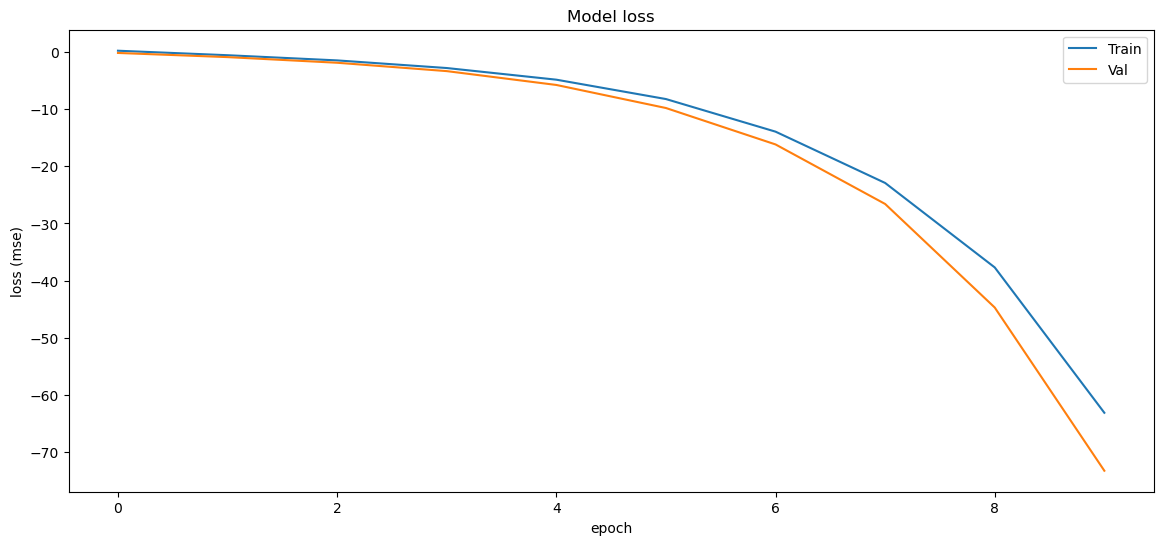

In [28]:
#plot the model loss vs epocs
plt.figure(figsize=(14,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

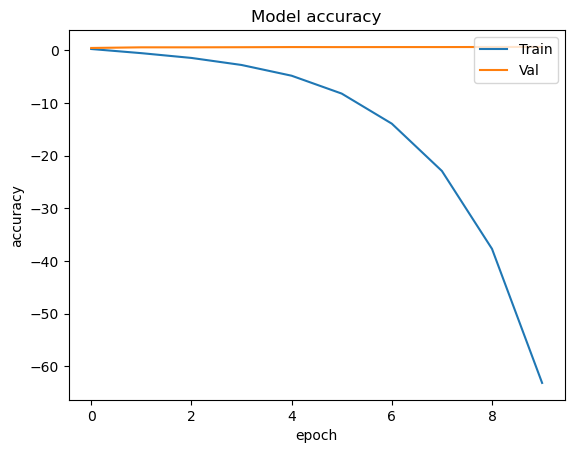

In [29]:
#plot the model loss vs accuracy
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['accuracy'][:])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Print accuracy 

In [30]:
# your code goes here
loss, accuracy = model.evaluate(X_train, y_train)

5/5 [==============================] - 0s 1ms/step - loss: -81.4305 - accuracy: 0.6479


In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
#display the prediction of first 5 values, then calculate mae, lastly print first 5 predictions
# Let's check how much we are off on average
# Enter three lines of code here:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
y_pred[0:5]

2/2 [==============================] - 0s 2ms/step


array([[0.32927758],
       [0.40559667],
       [1.        ],
       [0.08872059],
       [1.        ]], dtype=float32)

In [33]:
#print mae value
mae

0.3889799951058295

In [34]:
#print the real value of record 19
y_pred[19]

array([0.24219772], dtype=float32)

In [35]:
#use model.predict and numpy reshape, print predicted vlaue fo the same # above
model.predict(np.reshape(X_test[19], [1,12]))

1/1 [==============================] - 0s 18ms/step


array([[0.24219775]], dtype=float32)

## Confusion Matrix

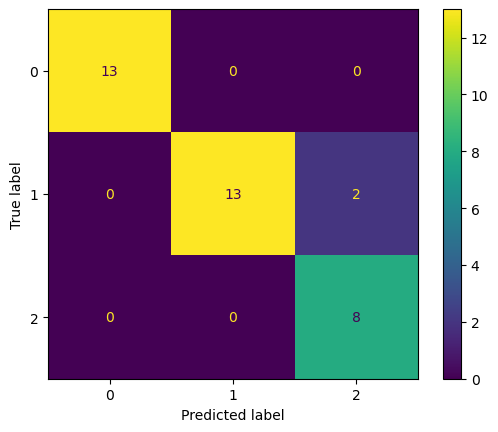

In [36]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

## Tunning Hyperparameters

In [37]:
# Create a folder path for Hyperparameter tuning
folder_path = "my_dir/intro_to_kt/"

In [38]:


# Remove any existing log files if they exist
folder_path = "my_dir/intro_to_kt/"
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
#     shutil.rmtree(folder_path)
    os.system("""rm -rf ./my_dir""")
    print(f"The folder '{folder_path}' has been deleted")
else: 
    print(f"The folder '{folder_path}' does not exist.")

The folder 'my_dir/intro_to_kt/' does not exist.


### Hyperparamters Tunning:

##### The number of neurons in the dense layer
##### The learning rate is searched for the values 0.01, 0.001 or 0.0001.

In [39]:
#Create a model-building functions
def model_builder(hp):
    
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units_1', min_value=24, max_value=32, step=4), 
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('Learning_rate', values=[1e-2, 1e-3, 1e-4])),
                 loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [40]:
tuner = RandomSearch(model_builder, objective='val_accuracy', max_trials=10, 
                    directory='my_dir', project_name='intro_to_kt')

In [41]:
# Search the hyperparameters to see which combination provides the best model results
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Trial 9 Complete [00h 00m 02s]
val_accuracy: 0.6111111044883728

Best val_accuracy So Far: 0.7222222089767456
Total elapsed time: 00h 00m 16s


In [42]:
# Retrieve the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [43]:
# Display the best hyperparameters
print(f"The hyperparameters search is complete.")
print(f"The optimal number of neurons is {best_hps.get('dense_units_1')}.")

The hyperparameters search is complete.
The optimal number of neurons is 28.


#### Build the final model using the optimal hyperparameters

In [44]:
# Create the final model with the optimal hyperparameters
final_model = tuner.hypermodel.build(best_hps)

In [45]:
#Fit Model
history = final_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 47ms/step - loss: 0.7926 - accuracy: 0.4155 - val_loss: 0.2269 - val_accuracy: 0.6389
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: -0.0191 - accuracy: 0.6338 - val_loss: -0.3901 - val_accuracy: 0.6944
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: -0.7137 - accuracy: 0.6479 - val_loss: -1.0261 - val_accuracy: 0.7222
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: -1.4152 - accuracy: 0.6549 - val_loss: -1.8190 - val_accuracy: 0.7222
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: -2.4334 - accuracy: 0.6761 - val_loss: -2.8024 - val_accuracy: 0.6944
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: -3.6380 - accuracy: 0.6761 - val_loss: -4.0312 - val_accuracy: 0.6944
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: -5.1425 - accuracy: 0.6761 - val_loss: -5.5460 - val_accuracy: 0.6944
Epoch 8/10
5/5 [=====

In [46]:
# Find the best epoch
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print("The best epoch: %d" % (best_epoch))

The best epoch: 3


In [47]:
#Evaluate the model
eval_result = final_model.evaluate(X_train, y_train)
print("[test loss, test accuracy]:", eval_result)

5/5 [==============================] - 0s 2ms/step - loss: -13.1908 - accuracy: 0.7042
[test loss, test accuracy]: [-13.190837860107422, 0.7042253613471985]


# Conclusions

In [51]:
# The model performed good.  Now, the issues I encountered were, I had to install all the different modules
# as I kept on running into errors preventing me from running the program at the beginning. Once I install all the modules
# modules, thereafter, I was able to obtain a positive result. Also, I did not notice any signs of overfitting.